In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Check the total number of tweets for each day, overlay with bitcoin closing price

In [13]:
#load bitcoin pricing information
price = pd.read_csv('../data/external/BTC_USD_2020-10-10_2021-10-09-CoinDesk.csv')
btcpdata = price[['Date', 'Closing Price (USD)']]
btcpdata["BTCdateTime"] = pd.to_datetime(btcpdata["Date"], format="%Y-%m-%d", errors='coerce')
btcpdata.info()

#to get rows from a period of time using dateTime
selected = btcpdata[(btcpdata['BTCdateTime'] > '2021-04-01') & (btcpdata['BTCdateTime'] < '2021-08-01')]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 365 non-null    object        
 1   Closing Price (USD)  365 non-null    float64       
 2   BTCdateTime          365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.7+ KB


/var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/ipykernel_22880/1793946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcpdata["BTCdateTime"] = pd.to_datetime(btcpdata["Date"], format="%Y-%m-%d", errors='coerce')


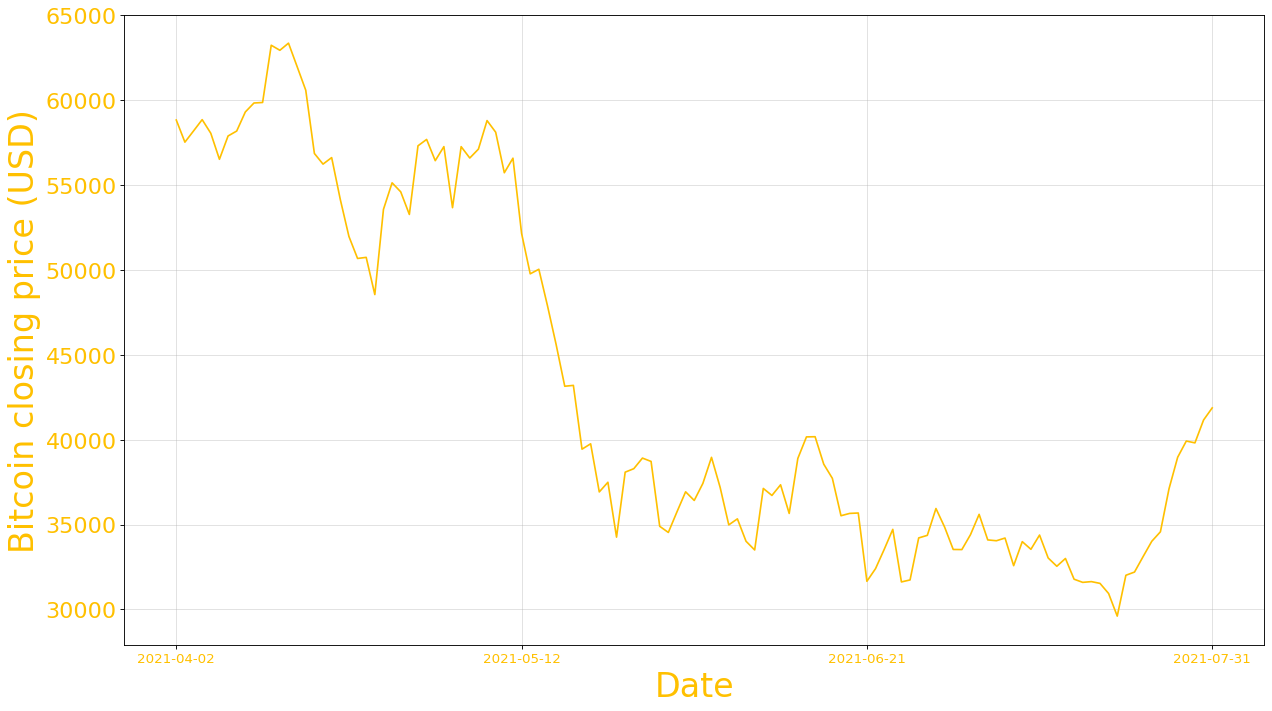

In [16]:
x = selected['Date']
y = selected['Closing Price (USD)']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y, color='#FFC000')


# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Date', fontsize=30, color='#FFC000')
ax1.tick_params(axis='x', rotation=0, labelsize=12, labelcolor='#FFC000')
ax1.set_ylabel('Bitcoin closing price (USD)', color='#FFC000', fontsize=30)
ax1.tick_params(axis='y', rotation=0, labelcolor='#FFC000', labelsize=20 )
ax1.grid(alpha=.4)
ax1.set_xticks(np.arange(0, len(x), 40)) #change this number to change the number of labels

fig.tight_layout()
plt.show()




Randomly select rows from each day

In [ ]:
#btcdata.groupby(btcdata['date_time'].dt.year).apply(lambda x :x.iloc[random.choice(range(0,len(x)))])
#btcdata.groupby(btcdata['date_time'].dt.year).apply(lambda x: x.sample(2)).reset_index(drop=True)

selected = data.groupby(data['dateTime'].dt.day).apply(lambda x: x.sample(10, random_state=889))

selected.to_csv('sample_bitcoin_tweets_ten_each_day.csv')
selected